In [ ]:
!pip install arch
import yfinance as yf
import numpy as np
import pandas as pd
import statsmodels.api as sm
from arch import arch_model
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from datetime import datetime, timedelta
import warnings
warnings.filterwarnings("ignore")
import pandas_datareader.data as web

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 985.3/985.3 kB 11.5 MB/s eta 0:00:00


In [ ]:
!pip install --upgrade pandas_datareader


In [ ]:
%load_ext autoreload
%autoreload 2
from google.colab import drive
drive.mount('/content/drive')

import os
import sys
GOOGLE_DRIVE_PATH_AFTER_MYDRIVE = 'ECMA 31330 Final Project'
GOOGLE_DRIVE_PATH = os.path.join('drive', 'MyDrive', GOOGLE_DRIVE_PATH_AFTER_MYDRIVE)
print(os.listdir(GOOGLE_DRIVE_PATH))
sys.path.append(GOOGLE_DRIVE_PATH)

Mounted at /content/drive
['Articles', 'SentimentScores', 'Aakash Gupta Final Project Presentation.gslides', 'Sp500Stocks.csv', 'SPY2015.csv', 'SPY2020.csv', 'SPY-2015_2020.csv', 'DataCleaningPipeline.ipynb', 'SentimentAnalysisPipeline.ipynb', 'GARCHFittingPipeline.ipynb', 'SimpleGARCHModel.ipynb']


In [ ]:
stocks = pd.read_csv(GOOGLE_DRIVE_PATH + "/SPY-2015_2020.csv")
stocks = stocks[2:]
stocks

,Price,Close,High,Low,Open,Volume
2,2014-12-31,172.68533325195312,174.91175014913608,172.55931521728235,174.74372182966204,130333800
3,2015-01-02,172.59291076660156,173.8111448920031,171.54271777555792,173.39106769558566,121465900
4,2015-01-05,169.4759063720703,171.70230987578518,169.16505342016106,171.5342815996109,169632600
5,2015-01-06,167.87962341308594,170.3160655379834,167.0730697163054,169.78676427385443,209151400
6,2015-01-07,169.97158813476562,170.31605442130996,168.77017382476237,169.2238514360209,125346700
...,...,...,...,...,...,...
1508,2020-12-23,347.1472473144531,349.08333460443055,346.81668809319564,347.8177905425075,46201400
1509,2020-12-24,348.4977111816406,348.5260431760125,347.03384343581655,347.6288153176249,26457900
1510,2020-12-28,351.4916687011719,351.88831670770304,350.45278064744303,351.08553826518647,39000400
1511,2020-12-29,350.8210754394531,353.2199570144629,350.2260746436619,353.0405114150347,53680500


In [ ]:
stocks['Return'] = 100 * pd.to_numeric(stocks.Close).pct_change()
stocks["Date"] = pd.to_datetime(stocks['Price'], format = '%Y-%m-%d')


Text(0.5, 1.0, 'SPY Return')

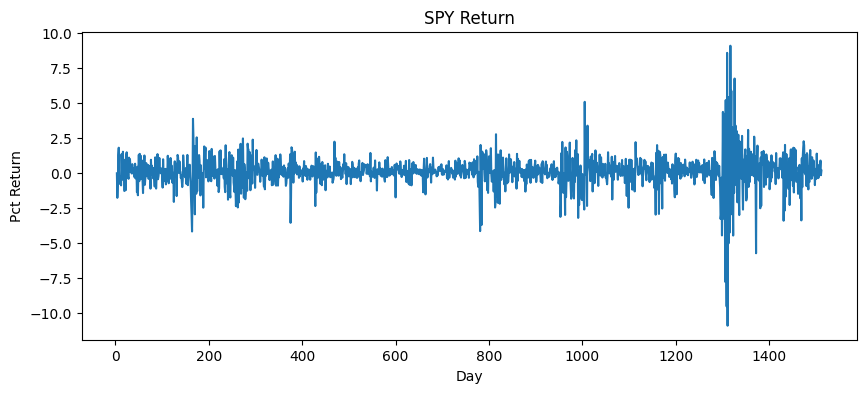

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(stocks['Return'])
plt.ylabel("Pct Return")
plt.xlabel("Day")
plt.title("SPY Return")



[]

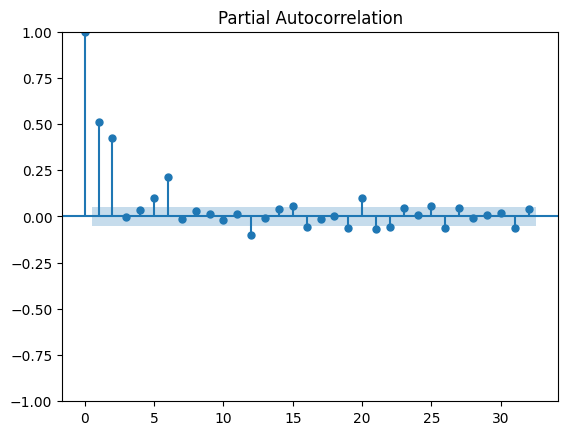

In [ ]:
plot_pacf(stocks['Return'].dropna()**2)
plt.plot()

Since there are two instances of autocorrelation, I will fit a simple GARCH(2,2) model and see if there are any issues with the estimates

In [ ]:
simple_model = arch_model(stocks["Return"].dropna(), p = 2, q = 2)
simple_model_fit = simple_model.fit()
simple_model_fit.summary()

Iteration:      1,   Func. Count:      8,   Neg. LLF: 9534.20356974979
Iteration:      2,   Func. Count:     20,   Neg. LLF: 2921843.8445743145
Iteration:      3,   Func. Count:     28,   Neg. LLF: 2479.8675374993127
Iteration:      4,   Func. Count:     36,   Neg. LLF: 4264.71057490248
Iteration:      5,   Func. Count:     45,   Neg. LLF: 2112.0702763468375
Iteration:      6,   Func. Count:     54,   Neg. LLF: 1898.3489547156034
Iteration:      7,   Func. Count:     62,   Neg. LLF: 1911.8576027025406
Iteration:      8,   Func. Count:     70,   Neg. LLF: 1829.6086254070856
Iteration:      9,   Func. Count:     77,   Neg. LLF: 1830.2321431589546
Iteration:     10,   Func. Count:     86,   Neg. LLF: 1829.4649057994648
Iteration:     11,   Func. Count:     94,   Neg. LLF: 1829.0883332554529
Iteration:     12,   Func. Count:    101,   Neg. LLF: 1829.0730314616887
Iteration:     13,   Func. Count:    108,   Neg. LLF: 1829.072869453864
Iteration:     14,   Func. Count:    115,   Neg. LLF: 18

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                 Return   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -1829.07
Distribution:                  Normal   AIC:                           3670.15
Method:            Maximum Likelihood   BIC:                           3702.06
                                        No. Observations:                 1510
Date:                Tue, Feb 25 2025   Df Residuals:                     1509
Time:                        22:45:06   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0959  1.739e-02      5.514  3.508e-08 [6.181e-02,  0.130]
                             Volatility Model                             
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega          0.0707  1.983e-02      3.566  3.631e-04 [3.183e-02,  0.110]
alpha[1]       0.2219  5.368e-02      4.134  3.561e-05   [  0.117,  0.327]
alpha[2]       0.2120  5.471e-02      3.875  1.067e-04   [  0.105,  0.319]
beta[1]    5.2297e-18  8.626e-02  6.063e-17      1.000   [ -0.169,  0.169]
beta[2]        0.5234  6.046e-02      8.657  4.825e-18   [  0.405,  0.642]
==========================================================================

Covariance estimator: robust
"""

$\alpha_2$ and $\beta_2$ are significant, which means I will stick with the current model. Hence, the goal is to now fit a GARCH(2,2)-X model, where the X variable is the market sentiment at time period t. We will also take a look at the forecast of volatility over time with this model.  

In [ ]:
rolling_predictions = []
test_size = 365
for i in range(test_size):
  train = stocks['Return'][:- (test_size - i)]
  model = arch_model(train.dropna(), p=2,q=2)
  model_fit = model.fit(disp = "off")
  prediction = model_fit.forecast(horizon = 1)
  rolling_predictions.append(np.sqrt(prediction.variance.values[-1,:][0]))

In [ ]:
rolling_predictions = pd.Series(rolling_predictions, index = stocks.index[-test_size:])

In this example, I am doing a time series forecast of 365 days. Since this is a time series model, I will be fitting 365 GARCH models with the specified parameters.

In the ith loop, I will take all the y values (Stock Returns), except for the last 365 - ith values. This will be my training subsample which will be used to fit the GARCH(2,2) model.

Next, the trained GARCH(2,2) model will be used to forecast the next time period t, which is just the next trading day. We will do this 365 times to get the next year forecast using the GARCH(2,2) model

Text(0.5, 1.0, 'Volatility Prediction - Rolling Forecast')

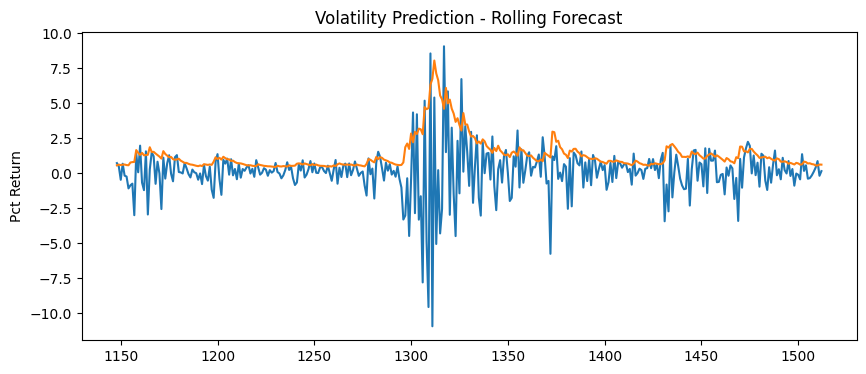

In [ ]:
plt.figure(figsize=(10,4))
true, = plt.plot(stocks['Return'][-test_size:])
preds, = plt.plot(rolling_predictions)
plt.ylabel("Pct Return")
plt.title("Volatility Prediction - Rolling Forecast")


Based off of the image alone, we can see that our rolling forecast seems to fit the data quite well.

One of the issues with a GARCH model is that it returns the conditional variance of the stock (volatility) at time t. This is actually an unobserved variable as we only see one random variable of the stock at time t.

One way around this is to take advantage of the distribution of the error term. As long as

In [1]:
from pickle import TRUE
import numpy as np
from scipy.optimize import minimize
from scipy.optimize import approx_fprime
from numpy.linalg import inv
def garch_x_log_likelihood(params, returns, market_sentiment, exog):

    #Log-likelihood function for a GARCH(2,2)-X model.
    if (exog == True):
      omega, alpha1, alpha2, beta1, beta2, gamma = params
      n = len(returns)
      sigma2 = np.zeros(n)
      sigma2[0] = np.var(returns)  # Initialize variance
      sigma2[1] = np.var(returns)

      for t in range(2, n):
        sigma2[t] = omega + alpha1 * returns[t-1]**2 + alpha2 * returns[t-2]**2 + beta1 * sigma2[t-1] + beta2 * sigma2[t-2] + gamma * market_sentiment[t]
      log_likelihood = -0.5 * np.sum(np.log(sigma2) + (np.square(returns)) / sigma2)
      return -log_likelihood  # Minimize negative log-likelihood
    else:

      omega, alpha1, alpha2, beta1, beta2, gamma = params
      n = len(returns)
      sigma2 = np.zeros(n)
      sigma2[0] = np.var(returns)  # Initialize variance
      sigma2[1] = np.var(returns)
      # Compute conditional variance

      for t in range(2, n):
        sigma2[t] = omega + alpha1 * returns[t-1]**2 + alpha2 * returns[t-2]**2 + beta1 * sigma2[t-1] + beta2 * sigma2[t-2]

      # Log-likelihood (assuming normal distribution)
      log_likelihood = -0.5 * np.sum(np.log(sigma2) + (np.square(returns)) / sigma2)
      return -log_likelihood  # Minimize negative log-likelihood

In [ ]:
initial_params = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1]
bounds = [(1e-6, None), (0, None), (0, None), (0, None), (0, None), (0, None)]

# Minimize the negative log-likelihood
result_exog = minimize(garch_x_log_likelihood, initial_params, args=(list(final_df['Return']), list(final_df["Negative"]), True),
                  bounds=bounds, method='L-BFGS-B')
result_baseline = minimize(garch_x_log_likelihood, initial_params, args=(list(final_df['Return']), list(final_df["Negative"]), False),
                  bounds=bounds, method='L-BFGS-B')
param_exog = result_exog.x
param_baseline = result_baseline.x
print(param_exog)

In [ ]:
##Returns the results of the central t tests.
def compute_hessian(func, params, args):
    n = len(params)
    hessian = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            def f(x):
              returns, market_sentiment, exog = args
              return func(x, returns, market_sentiment, exog)
            hessian[i, j] = approx_fprime(params, lambda x: approx_fprime(x, f, epsilon=1e-6)[j], epsilon=1e-6)[i]
    return hessian

# Compute the Hessian
hessian_exog = compute_hessian(garch_x_log_likelihood, param_exog, args = (list(final_df_filtered['Return']), list(final_df_filtered['Negative']), True))
hessian_baseline = compute_hessian(garch_x_log_likelihood, param_baseline, args = (list(final_df_filtered['Return']), list(final_df_filtered['Negative']), False))
# Compute the covariance matrix
cov_matrix_exog = inv(hessian_exog)
cov_matrix_baseline = inv(hessian_baseline)


# Compute standard errors
std_errors_exog = np.sqrt(np.diag(cov_matrix_exog))
std_errors_baseline = np.sqrt(np.diag(cov_matrix_baseline))

In [ ]:
from scipy.stats import t

# Degrees of freedom (n - number of parameters)
df = len(list(final_df['Return'])) - len(param_exog)

# Compute t-statistics
t_stats = param_exog / std_errors_exog

# Compute p-values (two-tailed test)
p_values = 2 * (1 - t.cdf(np.abs(t_stats), df))

# Display results
for i, param in enumerate(param_exog):
    print(f"Parameter {i}:")
    print(f"  Estimate: {param}")
    print(f"  Std Error: {std_errors_exog[i]}")
    print(f"  t-Statistic: {t_stats[i]}")
    print(f"  p-Value: {p_values[i]}")

In [ ]:
# Degrees of freedom (n - number of parameters)
df = len(list(final_df['Return'])) - len(param_baseline)

# Compute t-statistics
t_stats = param_exog / std_errors_baseline

# Compute p-values (two-tailed test)
p_values = 2 * (1 - t.cdf(np.abs(t_stats), df))

# Display results
for i, param in enumerate(param_baseline):
    print(f"Parameter {i}:")
    print(f"  Estimate: {param}")
    print(f"  Std Error: {std_errors_baseline[i]}")
    print(f"  t-Statistic: {t_stats[i]}")
    print(f"  p-Value: {p_values[i]}")